## Import all necessary packages

In [3]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import matplotlib.pyplot as plt
import importlib
import yaml

# Set path
import pathlib
import sys


## Load the merged file

Loads the file created by running the script `load_data.ipynb`

In [4]:
### import basepath from mission_config.yaml
with open('../load_data/config.yaml', 'r') as file:
        config = yaml.safe_load(file)
basepath = config['basepath']
safepath = config['safepath']
print('Basepath: ',basepath ,'\nSafepath: ',safepath)



Basepath:  /Users/eddifying/Dropbox/data/RAPID-data/hydro-data/WBTS-dup/ 
Safepath:  /Users/eddifying/Cloudfree/gitlab-cloudfree/WBTSdata/data


In [5]:
import glob

# Define the path to the merged data files
merged_data_path = os.path.join(safepath, 'Merged', '*.nc')

# Get a list of all files in the merged data directory
merged_files = glob.glob(merged_data_path)

processed_datasets = []
for file1 in merged_files:
    ds_new = xr.open_dataset(file1)
    if ds_new:
        processed_datasets.append(ds_new)
    else:
        print(f"Warning: Dataset for dive number {ds.attrs['dive_number']} is empty or invalid.")

ds_new

<xarray.Dataset> Size: 14MB
Dimensions:           (DEPTH: 5373, DATETIME: 35)
Coordinates:
  * DEPTH             (DEPTH) float64 43kB 1.0 2.0 3.0 ... 5.372e+03 5.373e+03
  * DATETIME          (DATETIME) datetime64[ns] 280B 2009-11-22T02:00:19 ... ...
    LATITUDE          (DATETIME) float64 280B ...
    LONGITUDE         (DATETIME) float64 280B ...
Data variables:
    TEMP              (DATETIME, DEPTH) float64 2MB ...
    THETA             (DATETIME, DEPTH) float64 2MB ...
    PSAL              (DATETIME, DEPTH) float64 2MB ...
    DYN_HEIGHT        (DATETIME, DEPTH) float64 2MB ...
    GA                (DATETIME, DEPTH) float64 2MB ...
    DOXY              (DATETIME, DEPTH) float64 2MB ...
    TIME_FLAG         (DATETIME) float64 280B ...
    CAST_NUMBER       (DATETIME) float64 280B ...
    GC_STRING         (DATETIME) <U10 1kB ...
    U_WATER_VELOCITY  (DATETIME, DEPTH) float64 2MB ...
    V_WATER_VELOCITY  (DATETIME, DEPTH) float64 2MB ...
    ERROR_VELOCITY    (DATETIME, DEPTH) float64 2MB ...
Attributes: (12/26)
    title:                      CTD and LADCP data of the Abaco Cruise
    project:                    Western Boundary Time Series
    project_id:                 AB0911 / D345
    platform:                   CTD and Lowered Acoustic Doppler Current Prof...
    geospatial_lat_min:         25.956
    geospatial_lat_max:         26.528
    ...                         ...
    data_url:                   
    web_link:                   https://www.aoml.noaa.gov/phod/wbts/data.php
    comment:                    GIT repository: https://github.com/ifmeo-hamb...
    date_created:               2024-11-25
    featureType:                profile
    Conventions:                CF-1.11

In [6]:

concatenated_ds = xr.concat(processed_datasets, dim='DATETIME')

### Plot of data coverage

In [8]:
ds_all = concatenated_ds.sortby('DATETIME')
ds_all

<xarray.Dataset> Size: 547MB
Dimensions:           (DATETIME: 1304, DEPTH: 5828)
Coordinates:
  * DEPTH             (DEPTH) float64 47kB 1.0 2.0 3.0 ... 5.827e+03 5.828e+03
  * DATETIME          (DATETIME) datetime64[ns] 10kB 2001-04-26T17:06:58 ... ...
    LATITUDE          (DATETIME) float64 10kB 26.45 27.02 26.43 ... 27.01 27.0
    LONGITUDE         (DATETIME) float64 10kB -79.92 -79.92 ... -79.86 -79.93
Data variables:
    TEMP              (DATETIME, DEPTH) float64 61MB 26.02 26.02 ... nan nan
    THETA             (DATETIME, DEPTH) float64 61MB 26.02 26.02 ... nan nan
    PSAL              (DATETIME, DEPTH) float64 61MB 36.23 36.23 ... nan nan
    DYN_HEIGHT        (DATETIME, DEPTH) float64 61MB 0.004 0.008 ... nan nan
    GA                (DATETIME, DEPTH) float64 61MB 0.993 1.987 ... nan nan
    DOXY              (DATETIME, DEPTH) float64 61MB 214.4 214.5 ... nan nan
    TIME_FLAG         (DATETIME) float64 10kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CAST_NUMBER       (DATETIME) float64 10kB 0.0 1.0 2.0 3.0 ... 46.0 47.0 48.0
    GC_STRING         (DATETIME) <U10 52kB 'GC_2001_04' ... 'GC_2018_11'
    U_WATER_VELOCITY  (DATETIME, DEPTH) float64 61MB nan nan nan ... nan nan nan
    V_WATER_VELOCITY  (DATETIME, DEPTH) float64 61MB nan nan nan ... nan nan nan
    ERROR_VELOCITY    (DATETIME, DEPTH) float64 61MB nan nan nan ... nan nan nan
Attributes: (12/26)
    title:                      CTD and LADCP data of the Abaco Cruise
    project:                    Western Boundary Time Series
    project_id:                 AB1202 / RB1201
    platform:                   CTD and Lowered Acoustic Doppler Current Prof...
    geospatial_lat_min:         26.038
    geospatial_lat_max:         30.022
    ...                         ...
    data_url:                   
    web_link:                   https://www.aoml.noaa.gov/phod/wbts/data.php
    comment:                    GIT repository: https://github.com/ifmeo-hamb...
    date_created:               2024-11-25
    featureType:                profile
    Conventions:                CF-1.11

/var/folders/t1/z5bp59k95119nw35yqv699t40000gn/T/ipykernel_7288/3577572240.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(ytick_labels)


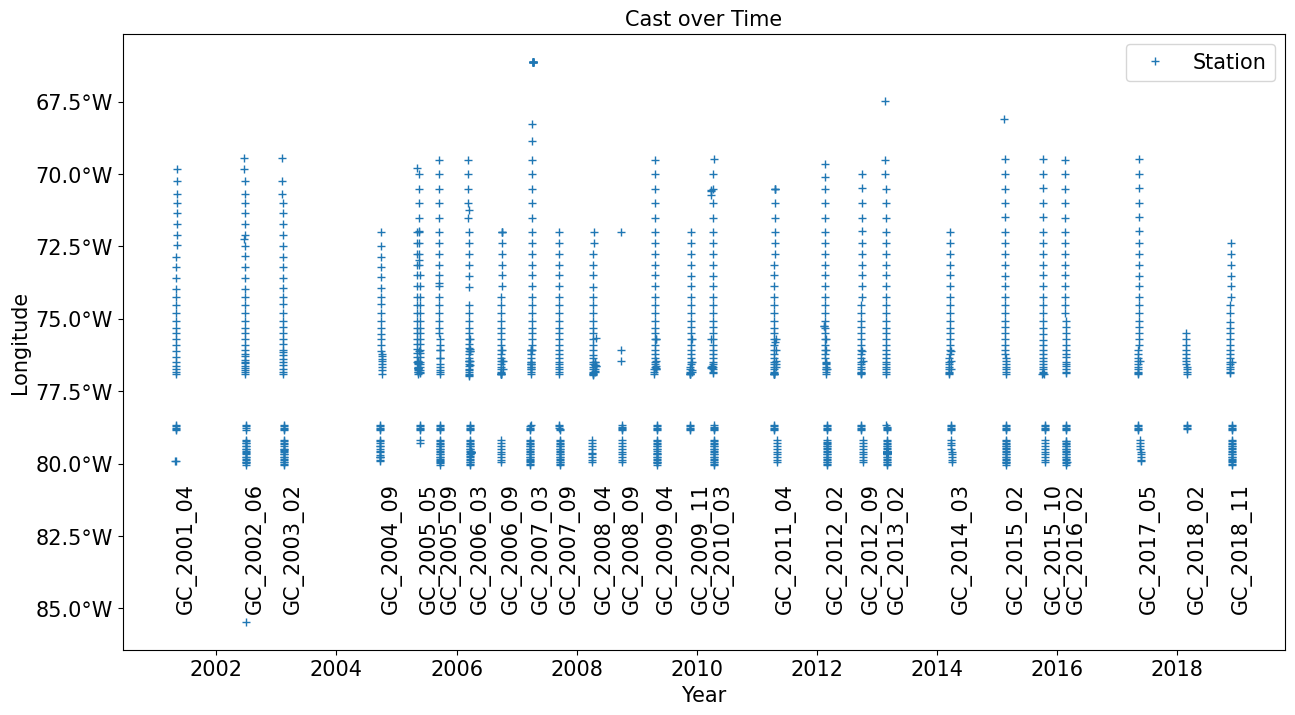

In [17]:


plt.figure(figsize=(15, 8))
plt.title('Cast over Time', fontsize=15)

# Plot the main data
plt.plot(ds_all['DATETIME'], -ds_all['LONGITUDE'], marker='+', linestyle='None', label='Station')

# Plot the unique gc_strings
unique_gc_strings = np.unique(ds_all['GC_STRING'].values)
for gc in unique_gc_strings:
    avg_datetime = ds_all['DATETIME'].where(ds_all['GC_STRING'] == gc).mean().values
    min_lon = ds_all['LONGITUDE'].where(ds_all['GC_STRING'] == gc).min().values - 2
    min_lon = 85
    plt.text(avg_datetime, min_lon, gc, rotation=90, fontsize=15)

# Append °W to all the longitudes in the xtick label
yticks = plt.gca().get_yticks()
ytick_labels = [f'{ytick}°W' for ytick in yticks]
plt.gca().set_yticklabels(ytick_labels)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().invert_yaxis()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.legend(fontsize=15)
plt.show()